# Bash commands to run the comparison between CRY and PARMA

* At location of Durham, GB
* Year 1962
* Altitude of 0 m

```bash
data_dir=~/geant_projects/cosmic_comparison
config_dif=../tests/cosmic_generator/
mkdir -p $data_dir

# CRY realworld time: 4710 seconds
./cry -s $config_dif/cry_proton_durham.conf -n 1000000 -o $data_dir/output/cry_protons.txt
# CRY realworld time: 1536.7 seconds
./cry -s $config_dif/cry_neutron_durham.conf -n 5000000 -o $data_dir/output/cry_neutrons.txt

# PARMA flux: 0.000363366  [/cm2/s]
./parma -s $config_dif/parma_durham.conf -p 2212 -n 10000000 -o $data_dir/output/parma_protons.txt
# PARMA flux: 0.00583118  [/cm2/s]
./parma -s $config_dif/parma_durham.conf -p 2112 -n 10000000 -o $data_dir/output/parma_neutrons.txt

```


# Bash commands to run PARMA at different heights

* At location of CMS (LHC Point 5)
* Year 2025
* Altitude of 0 m, 511 m


```bash

# CRY realworld time: 5741.47 seconds, 10 m^2
./cry -s $config_dif/cry_proton_cms_0m.conf -n 1000000 -o $data_dir/output/cry_protons_cms_0m.txt
# CRY realworld time: 4180 seconds, 10 m^2
./cry -s $config_dif/cry_neutron_cms_0m.conf -n 10000000 -o $data_dir/output/cry_neutrons_cms_0m.txt

# PARMA flux: 0.00034  [/cm2/s]
./parma -s $config_dif/parma_cms_0m.conf -p 2212 -n 1000000 -o $data_dir/output/parma_protons_cms_0m.txt
# PARMA flux: 0.0055  [/cm2/s]
./parma -s $config_dif/parma_cms_0m.conf -p 2112 -n 1000000 -o $data_dir/output/parma_neutrons_cms_0m.txt

# PARMA flux: 0.00058  [/cm2/s]
./parma -s $config_dif/parma_cms_511m.conf -p 2212 -n 1000000 -o $data_dir/output/parma_protons_cms_511m.txt
# PARMA flux: 0.0089  [/cm2/s]
./parma -s $config_dif/parma_cms_511m.conf -p 2112 -n 1000000 -o $data_dir/output/parma_neutrons_cms_511m.txt

```

# Bash commands to check CRY after the modification

* At location of CMS (LHC Point 5)
* Year 2025
* Altitude of 0 m, 511 m


```bash

# CRY realworld time: 418 seconds
./cry -s $config_dif/cry_neutron_cms_0m.conf -n 1000000 -o $data_dir/output/cry_neutrons_cms_0m_single.txt

```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def k2p(k, mass=938.27e-3):
    return np.sqrt(k**2+2*k*mass)

def p2k(p, mass=938.27e-3):
    return np.sqrt(p**2+mass**2) - mass

def load_cry(filename):
    # 3:KE[MeV] 4:x[m] y[m] z[m] 7:u v w t[s]

    data_raw = np.loadtxt(filename, skiprows=1, delimiter=" ")
    data = {}
    data["x"] = data_raw[:,4]
    data["y"] = data_raw[:,5]
    data["z"] = data_raw[:,6]
    data["u"] = data_raw[:,7]
    data["v"] = data_raw[:,8]
    data["w"] = data_raw[:,9]
    data["ekin"] = data_raw[:,3]/1000
    data["zenith_angle"] = np.arccos(-data_raw[:,9]/np.linalg.norm(data_raw[:,7:10], axis=1))
    data["p_tot"] = k2p(data["ekin"])
    return data


data_dir="/home/tomren/geant_projects/cosmic_comparison/output/"


---

In [3]:
data_dir="/home/tomren/geant_projects/cosmic_comparison/output/"


data_cry_n = load_cry(f"{data_dir}/cry_neutrons_cms_0m.txt")
data_cry_p = load_cry(f"{data_dir}/cry_protons_cms_0m.txt")
data_parma_n_0 = load_cry(f"{data_dir}/parma_neutrons_cms_0m.txt")
data_parma_n_511 = load_cry(f"{data_dir}/parma_neutrons_cms_511m.txt")
data_parma_p_0 = load_cry(f"{data_dir}/parma_protons_cms_0m.txt")
data_parma_p_511 = load_cry(f"{data_dir}/parma_protons_cms_511m.txt")



In [6]:
# plt.scatter(data_cry_n["x"][::10], data_cry_n["y"][::10], alpha=0.1)

165536
8969
8799


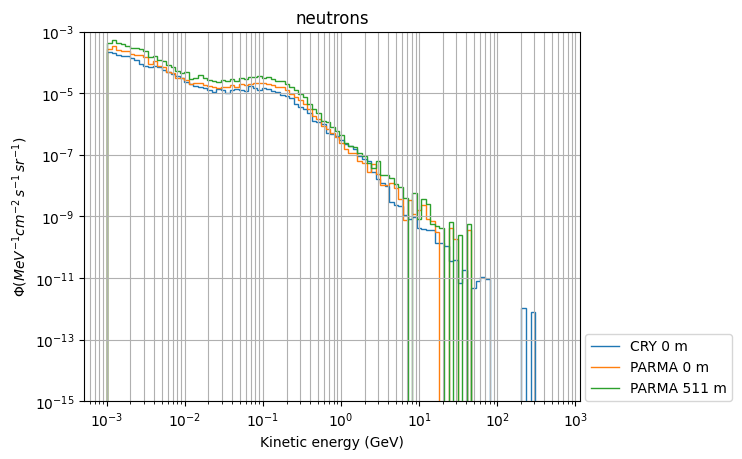

In [6]:
bins = np.logspace(np.log10(0.001), np.log10(600), 100)
binwidth = (bins[1:] - bins[:-1]) * 1000 # Turn to MeV

angle_cut_rad = 0.1
angle_sterad = 2*np.pi*(1-np.cos(angle_cut_rad/2))

# Line 1
cry_area = (10_00)**2
cry_norm = 4180*cry_area*angle_sterad
x = data_cry_n["ekin"]
mask = np.abs(data_cry_n["zenith_angle"])<angle_cut_rad
n1, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/cry_norm)
plt.stairs(n1/binwidth, ibins, label="CRY 0 m")
print(sum(mask))

# Line 2
parma_norm = len(data_parma_n_0["ekin"])/0.0055 * angle_sterad
x = data_parma_n_0["ekin"]
mask = np.abs(data_parma_n_0["zenith_angle"])<angle_cut_rad
n2, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/parma_norm)
plt.stairs(n2/binwidth, ibins, label="PARMA 0 m")
print(sum(mask))

# Line 2
parma_norm = len(data_parma_n_511["ekin"])/0.0089 * angle_sterad
x = data_parma_n_511["ekin"]
mask = np.abs(data_parma_n_511["zenith_angle"])<angle_cut_rad
n2, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/parma_norm)
plt.stairs(n2/binwidth, ibins, label="PARMA 511 m")
print(sum(mask))



plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r'$\Phi [ cm^{-2} \, s^{-1} \, sr^{-1} MeV^{-1}$]')
plt.xlabel("Kinetic energy [GeV]")

# plt.xlim(0.1,1000)
plt.xlabel('Kinetic energy (GeV)')
plt.ylim(1e-15, 1e-3)
plt.ylabel(r'$\Phi (MeV^{-1} cm^{-2} \, s^{-1} \, sr^{-1}$)')
plt.legend(loc=(1.01,0))
plt.grid(which="both")
plt.title("neutrons")
# plt.savefig("fig_neutrons.png")
plt.show()

26067
19564
19834


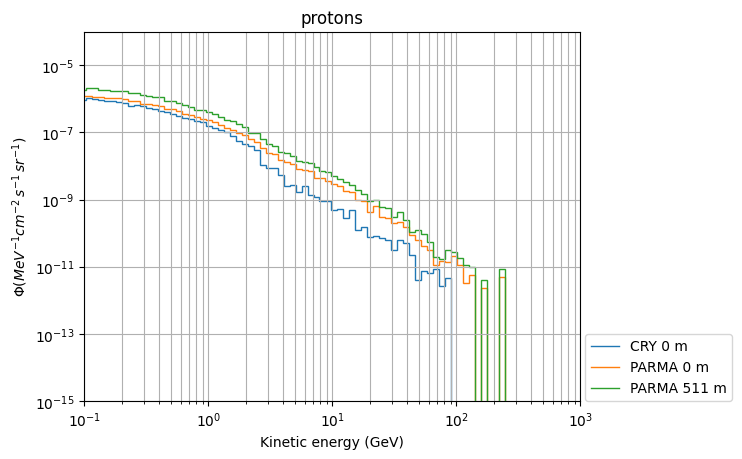

In [7]:
bins = np.logspace(np.log10(0.01), np.log10(600), 100)
binwidth = (bins[1:] - bins[:-1]) * 1000 # Turn to MeV

# Line 1
cry_area = (10_00)**2
cry_norm = 5741*cry_area*angle_sterad
x = data_cry_p["ekin"]
mask = np.abs(data_cry_p["zenith_angle"])<angle_cut_rad
n1, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/cry_norm)
plt.stairs(n1/binwidth, ibins, label="CRY 0 m")
print(sum(mask))


# Line 2
parma_norm_0 = len(data_parma_p_0["ekin"])/0.00034 * angle_sterad
x = data_parma_p_0["ekin"]
mask = np.abs(data_parma_p_0["zenith_angle"])<angle_cut_rad
n2, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/parma_norm_0)
plt.stairs(n2/binwidth, ibins, label="PARMA 0 m")
print(sum(mask))

# Line 2
parma_norm_511 = len(data_parma_p_511["ekin"])/0.00058 * angle_sterad
x = data_parma_p_511["ekin"]
mask = np.abs(data_parma_p_511["zenith_angle"])<angle_cut_rad
n2, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/parma_norm_511)
plt.stairs(n2/binwidth, ibins, label="PARMA 511 m")
print(sum(mask))



plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r'$\Phi [ cm^{-2} \, s^{-1} \, sr^{-1} MeV^{-1}$]')
plt.xlabel("Kinetic energy [GeV]")

plt.xlim(0.1,1000)
plt.xlabel('Kinetic energy (GeV)')
plt.ylim(1e-15, 1e-4)
plt.ylabel(r'$\Phi (MeV^{-1} cm^{-2} \, s^{-1} \, sr^{-1}$)')
plt.legend(loc=(1.01,0))
plt.grid(which="both")
plt.title("protons")
# plt.savefig("fig_neutrons.png")
plt.show()

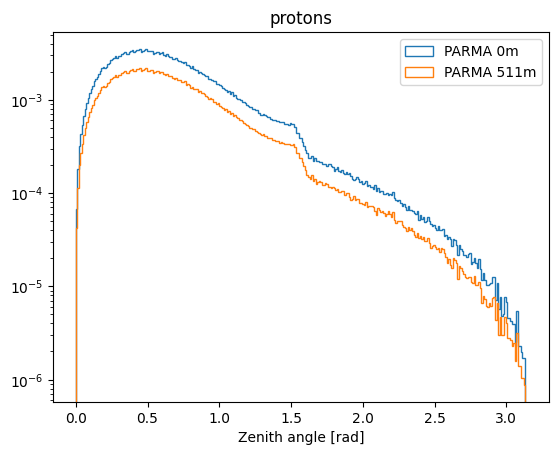

In [21]:
bins=np.linspace(0,np.pi,300)
plt.hist(data_parma_p_0["zenith_angle"], bins=bins,histtype="step", label="PARMA 0m", weights=np.ones(len(data_parma_p_0["zenith_angle"]))/parma_norm_511)
plt.hist(data_parma_p_511["zenith_angle"], bins=bins,histtype="step", label="PARMA 511m", weights=np.ones(len(data_parma_p_511["zenith_angle"]))/parma_norm_0)
plt.xlabel("Zenith angle [rad]")
plt.legend()
plt.title("protons")
plt.yscale("log")
# plt.savefig("fig_neutron_angle.png")


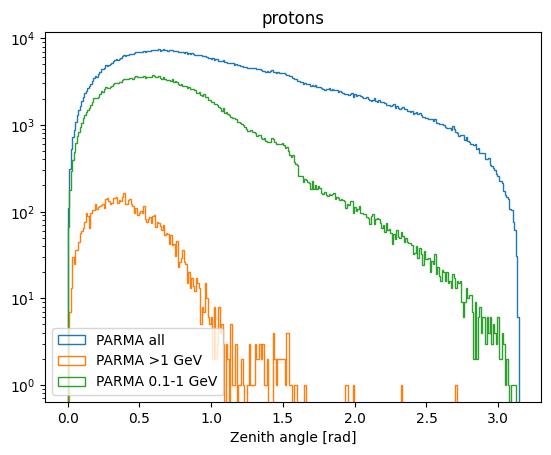

In [27]:
bins=np.linspace(0,np.pi,300)
plt.hist(data_parma_n_0["zenith_angle"], bins=bins,histtype="step", label="PARMA all")
plt.hist(data_parma_n_0["zenith_angle"][data_parma_n_0["ekin"]>1], bins=bins,histtype="step", label="PARMA >1 GeV")
plt.hist(data_parma_n_0["zenith_angle"][(data_parma_n_0["ekin"]>0.1)&(data_parma_n_0["ekin"]<1)], bins=bins,histtype="step", label="PARMA 0.1-1 GeV")
plt.xlabel("Zenith angle [rad]")
plt.legend()
plt.title("protons")
plt.yscale("log")
# plt.savefig("fig_neutron_angle.png")

---
# Check the modified CRY with profiled distribution

**doesn't work....**

In [ ]:
data_cry_n_single = load_cry(f"{data_dir}/cry_neutrons_cms_0m_single.txt")
data_cry_n = load_cry(f"{data_dir}/cry_neutrons_cms_0m.txt")


64787


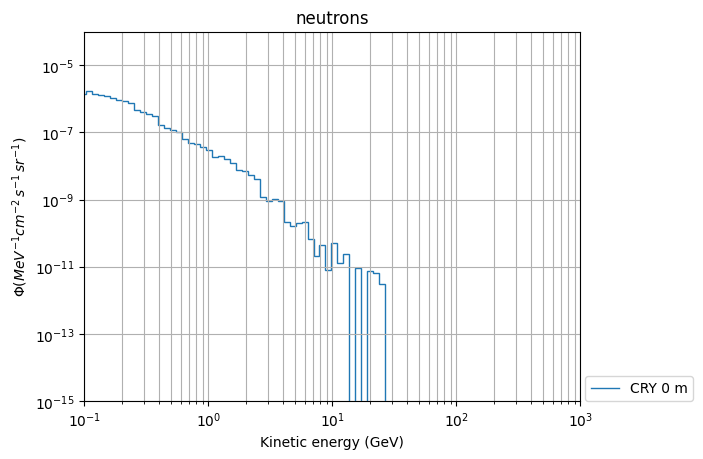

In [5]:
bins = np.logspace(np.log10(0.01), np.log10(600), 100)
binwidth = 0.5*(bins[1:]+bins[:-1]) * 1000 # Turn to MeV

angle_cut_rad = 0.2
angle_sterad = 2*np.pi*(1-np.cos(angle_cut_rad/2))

# Line 1
cry_area = (10*100)**2
cry_norm = 418*cry_area*angle_sterad
x = data_cry_n["ekin"]
mask = np.abs(data_cry_n["zenith_angle"])<angle_cut_rad
n1, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/cry_norm)
plt.stairs(n1/binwidth, ibins, label="CRY 0 m")
print(sum(mask))

plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r'$\Phi [ cm^{-2} \, s^{-1} \, sr^{-1} MeV^{-1}$]')
plt.xlabel("Kinetic energy [GeV]")

plt.xlim(0.1,1000)
plt.xlabel('Kinetic energy (GeV)')
plt.ylim(1e-15, 1e-4)
plt.ylabel(r'$\Phi (MeV^{-1} cm^{-2} \, s^{-1} \, sr^{-1}$)')
plt.legend(loc=(1.01,0))
plt.grid(which="both")
plt.title("neutrons")
# plt.savefig("fig_neutrons.png")
plt.show()